# Library Import

In [1]:
import numpy as np

# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.applications import resnet50

# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.applications import vgg16


from tensorflow.keras.preprocessing import image

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt

# (VGG16) 가져다 쓸 Model 객체 Load 

In [2]:
model_vgg_conv = vgg16.VGG16( weights='imagenet', include_top=False, input_shape=(98,98,3) ) # input_shape은 우리가 지정

## Load한 model summary( ) ==> Dense 부분이 없는 것을 알 수 있다.

```
왜 Dense 부분이 없을까?
==> 우리는 feature extractor(특징 추출기)만 가져올 것이기 때문임
==> Dense 부분은 우리가 학습할 것임
==> 그래서 새로운 분류기를 만들 것임
```

In [3]:
model_vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 98, 98, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 98, 98, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 98, 98, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 49, 49, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 49, 49, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 49, 49, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

## 특징 추출기(feature extractor)는 학습 시 제외하겠다는 뜻

### (주의!!) model_vgg_conv에 대해서 해야함 ==> model명 헷갈리지 않기

In [4]:
for layer in model_vgg_conv.layers:
    layer.trainable = False

## Modeling (vgg16)


```
- model_vgg_conv는 특징추출기만을 가져온거다
```

### 전체 Data 가져오기

```
- batch_size가 default로 32라서 바꿔줘야함 ==> 32개의 데이터밖에 못가져오므로!!
- 우리는 각 class당 50개의 데이터를 가지고 있고, class가 3개이므로 ==> 총 150개의 데이터가 있으므로 => batch_size=150
```

In [10]:
dataGen = image.ImageDataGenerator( rescale=1./255)
trainGen = dataGen.flow_from_directory( 'image3', target_size=(98,98), batch_size=1908) # (98,98)인 이유는 model_conv.summary()의 맨 처음을 봐라
x_train, y_train = trainGen.next()

Found 1904 images belonging to 2 classes.


#### Train data shape 확인

In [11]:
x_train.shape

(1904, 98, 98, 3)

### Train / Test Data split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_train,
                                                    y_train,
                                                    test_size=0.3,
                                                    stratify=y_train)

In [14]:
x_train.shape, y_train.shape

((1332, 98, 98, 3), (1332, 2))

In [15]:
x_test.shape, y_test.shape

((572, 98, 98, 3), (572, 2))

#### Train / validation data split

In [16]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,
                                                      y_train,
                                                      test_size=0.3,
                                                      stratify=y_train)

In [17]:
x_train.shape, y_train.shape

((932, 98, 98, 3), (932, 2))

In [18]:
x_valid.shape, y_valid.shape

((400, 98, 98, 3), (400, 2))

### conduct modeling

In [ ]:
model = Sequential()
model.add( model_vgg_conv) # model_vgg_conv는 특징추출기만을 가져온거다. ( con, relu, pool )

model.add( Flatten())
model.add( Dense( units=128, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 32, activation='relu'))
model.add( Dense( units=2, activation='softmax'))

# model.compile( loss="categorical_crossentropy", optimizer='adam', metrics=['acc'])
model.compile( loss="categorical_crossentropy",
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

model.fit( x_train, y_train, epochs=100, validation_data=(x_valid, y_valid))

Epoch 1/100
30/30 [==============================] - 17s 560ms/step - loss: 0.5239 - acc: 0.7554 - val_loss: 0.4016 - val_acc: 0.8325
Epoch 2/100
30/30 [==============================] - 16s 554ms/step - loss: 0.3469 - acc: 0.8573 - val_loss: 0.4188 - val_acc: 0.8025
Epoch 3/100
30/30 [==============================] - 17s 560ms/step - loss: 0.2918 - acc: 0.8798 - val_loss: 0.2984 - val_acc: 0.8675
Epoch 4/100
13/30 [============>.................] - ETA: 6s - loss: 0.2488 - acc: 0.9087

## Prediction

### Test data

In [16]:
x_test.shape, x_test

((543, 98, 98, 3),
 array([[[[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.01568628, 0.01176471, 0.00392157],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.01568628, 0.01176471, 0.00392157],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00392157, 0.00392157, 0.00392157]],
 
         ...,
 
         [[0.10196079, 0.08235294, 0.05882353],

### make a prediction

#### probability

In [17]:
model.predict( x_test)

array([[1.8207908e-13, 1.0000000e+00],
       [6.8637696e-10, 1.0000000e+00],
       [1.6027747e-03, 9.9839717e-01],
       ...,
       [1.0000000e+00, 4.1200221e-09],
       [9.9999928e-01, 7.3730746e-07],
       [3.7327605e-01, 6.2672395e-01]], dtype=float32)

#### 최종 class

In [18]:
model.predict( x_test).argmax(axis=1)

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

### Label(정답) 확인

In [19]:
trainGen.class_indices

{'lion': 0, 'tiger': 1}

## Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score,  f1_score
import seaborn as sns

In [22]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

In [29]:
plt.rcParams['figure.figsize'] = [14, 9]
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 25

### Train data

In [26]:
confusion_matrix(y_train.argmax(axis=1), model.predict( x_train).argmax(axis=1))

array([[442,   0],
       [  0, 443]], dtype=int64)

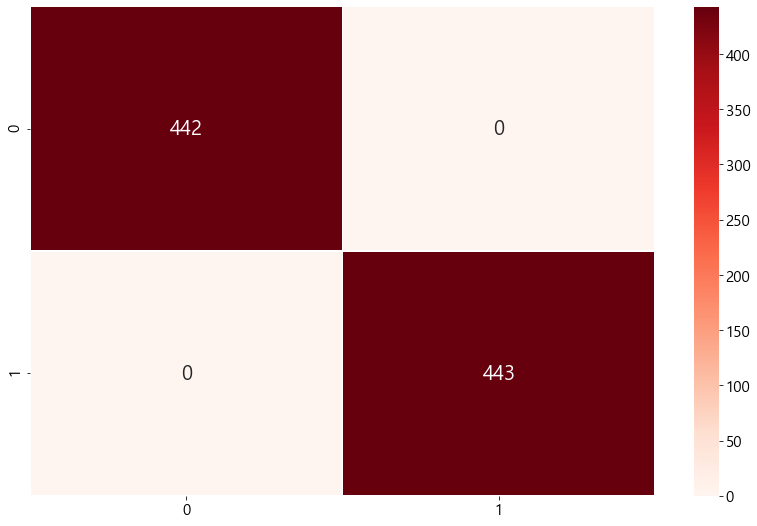

In [30]:
sns.heatmap(confusion_matrix(y_train.argmax(axis=1), model.predict( x_train).argmax(axis=1)),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
           );

### Test data

In [32]:
confusion_matrix(y_test.argmax(axis=1), model.predict( x_test).argmax(axis=1))

array([[250,  22],
       [ 33, 238]], dtype=int64)

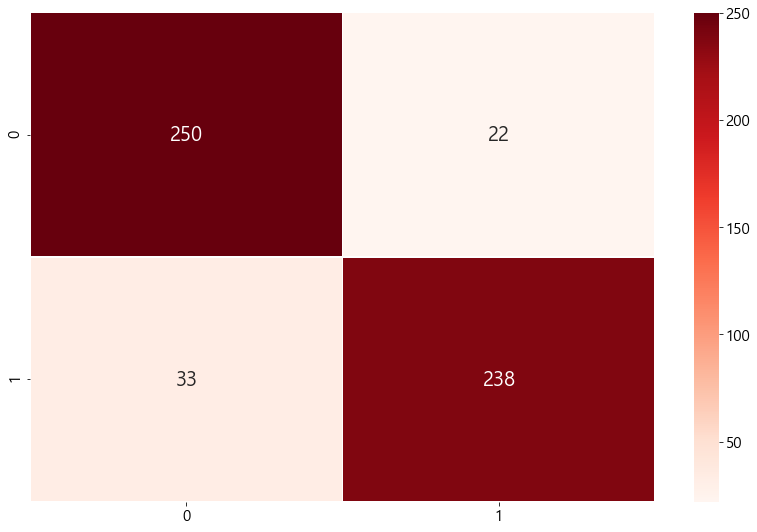

In [33]:
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), model.predict( x_test).argmax(axis=1)),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
           );

## Accuracy

### Train data

In [34]:
model.evaluate(x_train, y_train)

28/28 [==============================] - 11s 395ms/step - loss: 2.1013e-08 - acc: 1.0000


[2.1013160989014068e-08, 1.0]

### Test data

In [35]:
model.evaluate(x_test, y_test)

17/17 [==============================] - 7s 399ms/step - loss: 0.8314 - acc: 0.8987


[0.8314428329467773, 0.8987108469009399]

## f1 score

### Train data

In [37]:
f1 = f1_score(y_train.argmax(axis=1), model.predict( x_train).argmax(axis=1))
print(f'F1 스코어: {f1:.4f}')

F1 스코어: 1.0000


### Test data

In [36]:
f1 = f1_score(y_test.argmax(axis=1), model.predict( x_test).argmax(axis=1))
print(f'F1 스코어: {f1:.4f}')

F1 스코어: 0.8964


## 전혀 다른 새로운 데이터 Test

```
새로운 데이터를 다시 크롤링 ==> 새로운 Test data ==> accuracy 계산
```

In [38]:
dataGen = image.ImageDataGenerator( rescale=1./255)
testGen = dataGen.flow_from_directory( 'image5', target_size=(98,98), batch_size=270) # (98,98)인 이유는 model_conv.summary()의 맨 처음을 봐라
x_test_new, y_test_new = testGen.next()

Found 270 images belonging to 2 classes.


### Accuracy

In [39]:
model.evaluate(x_test_new, y_test_new)

9/9 [==============================] - 3s 373ms/step - loss: 1.6636 - acc: 0.8741


[1.6635879278182983, 0.8740741014480591]

### Confusion Matrix

In [43]:
confusion_matrix(y_test_new.argmax(axis=1) ,model.predict( x_test_new).argmax(axis=1))

array([[116,  19],
       [ 15, 120]], dtype=int64)

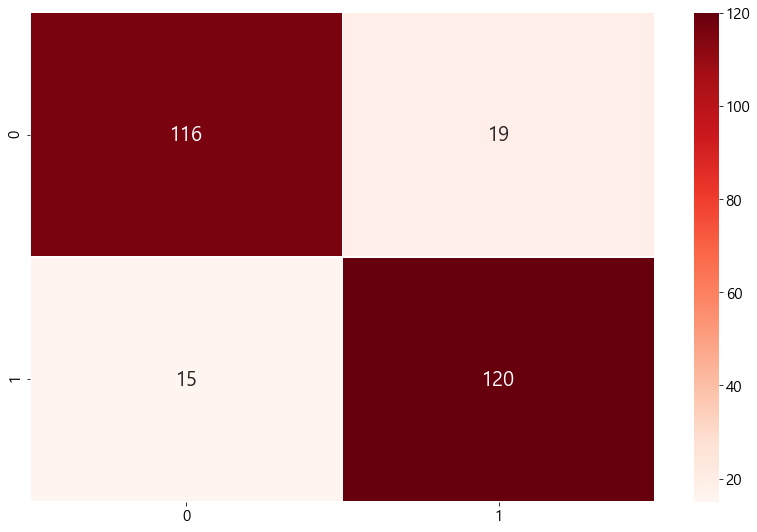

In [44]:
sns.heatmap(confusion_matrix(y_test_new.argmax(axis=1) ,model.predict( x_test_new).argmax(axis=1)),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
           );

### f1 score

In [42]:
f1 = f1_score(y_test_new.argmax(axis=1) ,model.predict( x_test_new).argmax(axis=1))
print(f'F1 스코어: {f1:.4f}')

F1 스코어: 0.8759
